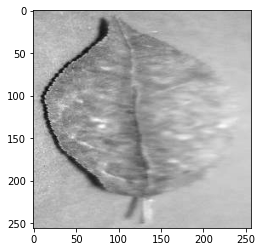

torch.Size([1, 1, 256, 256])


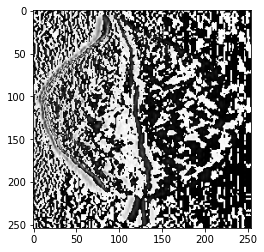

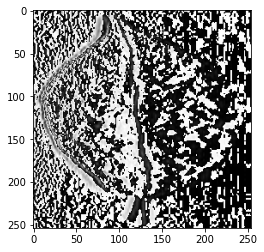

In [ ]:
import torch 
import numpy as np
from torch import nn
from torch.autograd import Variable
import torch.nn.functional as F
from PIL import Image
import matplotlib.pyplot as plt

def show_img(arr):
  plt.imshow(arr.astype('uint8'),cmap='gray')
  plt.show()

if __name__ == '__main__':
  # PIL读取图片
  img= Image.open("/content/yp.JPG")
  gray = img.convert('L')
  arr = np.array(gray,dtype='float32')
  show_img(arr)
  tensor = torch.from_numpy(arr.reshape((1,1,arr.shape[0],arr.shape[1])))
  print(tensor.shape)
  conv1 = nn.Conv2d(1,1,1,bias=True)
  sobel_kernel = np.array([
              [-1,0,1],
              [-1,0,1],
              [-1,0,1]],dtype='float32')
  assert(sobel_kernel.shape==(3,3))
  sobel_kernel = sobel_kernel.reshape((1,1,3,3))
  conv1.weight.data = torch.from_numpy(sobel_kernel)
  edge1 = conv1(tensor)
  edge1 = edge1.squeeze().detach().numpy()
  show_img(edge1)

  weight = Variable(torch.from_numpy(sobel_kernel))
  edge2 = F.conv2d(Variable(tensor),weight)
  edge2 = edge2.data.squeeze().numpy()
  show_img(edge2)



In [ ]:
%matplotlib inline

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [ ]:
img = cv2.imread("/content/yp.JPG")
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img0 = img
print(img.shape)
# img = np.transpose(img,(2,0,1))
img = img[np.newaxis,:]
img = img[np.newaxis,:]
print(img.shape)
inp = torch.Tensor(img)

#定义卷积核
conv1 = nn.Conv2d(1,1,(3,3))
conv2 = nn.Conv2d(1,1,(3,3))
conv3 = nn.Conv2d(1,1,(3,3))
conv4 = nn.Conv2d(1,1,(3,3))

(256, 256)
(1, 1, 256, 256)


In [ ]:
# 高斯滤波
w1 = torch.Tensor(np.array([[1/16, 1/8, 1/16], [1/8, 1/4, 1/8], [1/16, 1/8, 1/16]])).reshape(1,1,3,3)
# 边缘检测1
w2 = torch.Tensor(np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]]).reshape(1, 1, 3, 3))
# 边缘检测2
w3 = torch.Tensor(np.array([[0, 1, 1], [-1, 0, 1], [-1, -1, 0]]).reshape(1, 1, 3, 3))
# Sobel算子
sobel_kernel = np.array([
            [-1,0,1],
            [-1,0,1],
            [-1,0,1]],dtype='float32')
w4 = torch.Tensor(sobel_kernel.reshape(1,1,3,3))

conv1.weight = nn.Parameter(w1)
# conv1.__getattr__("weight")
conv2.weight = nn.Parameter(w2)
conv3.weight = nn.Parameter(w3)
conv4.weight = nn.Parameter(w4)

In [ ]:
out1 = conv1(inp).detach().numpy()
out2 = conv2(inp).detach().numpy()
out3 = conv3(inp).detach().numpy()
out4 = conv4(torch.from_numpy(out1)).detach().numpy()

out1 = np.transpose(out1,(0,2,3,1))
out2 = np.transpose(out2,(0,2,3,1))
out3 = np.transpose(out3,(0,2,3,1))
out4 = np.transpose(out4,(0,2,3,1))

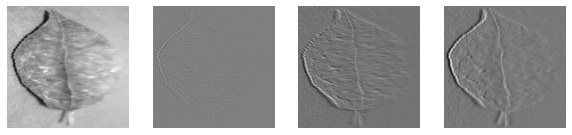

In [ ]:
# 显示


plt.figure(figsize=(10, 5))
plt.axis('off')
plt.subplot(141)
plt.axis('off')
plt.imshow(img0.squeeze(), cmap="gray")
# plt.subplot(142)
# plt.imshow(out1.squeeze(), cmap='gray')
plt.subplot(142)
plt.axis('off')
plt.imshow(out2.squeeze(), cmap='gray')
plt.subplot(143)
plt.axis('off')
plt.imshow(out3.squeeze(), cmap='gray')
plt.subplot(144)
plt.imshow(out4.squeeze(), cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
print(np.newaxis)

None


In [ ]:
import numpy as np
a = np.arange(10)
a
a.shape
a[:,np.newaxis]
a[np.newaxis,:]
a[:,np.newaxis].shape

(10, 1)

##  图像预处理

### 1.裁剪

In [ ]:
%matplotlib inline

<PIL.Image.Image image mode=RGB size=0x0 at 0x7FF888867990>


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


SystemError: ignored

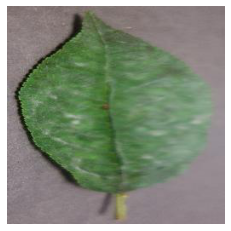

In [ ]:

import matplotlib.pyplot as plt
import PIL.Image as Image
import os
from torchvision import transforms as transforms

im = Image.open("/content/yp.JPG")

#transforms.CenterCrop(0.5)
plt.axis("off")
plt.subplot(111)
plt.imshow(im)

# 进行裁剪
crop = torchvision.transforms.CenterCrop(0.5)(im)


plt.axis("off")
# plt.subplot(111)
print(crop)
trans1 = transforms.ToTensor()
crop = trans1(crop)
print(crop)
plt.imshow(crop)